In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import joblib
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder

In [11]:
df=pd.read_csv("../data/processed/preproced_data.csv")

In [12]:
df

,Unnamed: 0.1,Unnamed: 0,resume_text,job_role,text_length,char_length,cleaned_text
0,0,0,ACCOUNTANT\nSummary\nFinancial Accountant spec...,ACCOUNTANT,3466,24159,accountant summary financial accountant specia...
1,1,1,STAFF ACCOUNTANT\nSummary\nHighly analytical a...,ACCOUNTANT,1047,7493,staff accountant summary highly analytical det...
2,2,2,ACCOUNTANT\nProfessional Summary\nTo obtain a ...,ACCOUNTANT,628,4749,accountant professional summary obtain positio...
3,3,3,SENIOR ACCOUNTANT\nExperience\nCompany Name Ju...,ACCOUNTANT,849,5922,senior accountant experience company name june...
4,4,4,SENIOR ACCOUNTANT\nProfessional Summary\nSenio...,ACCOUNTANT,783,5574,senior accountant professional summary senior ...
...,...,...,...,...,...,...,...
2476,2476,2479,READING TEACHER\nSummary\nI am a highly motiva...,TEACHER,845,6078,reading teacher summary highly motivated educa...
2477,2477,2480,HISTORY TEACHER\nProfessional Summary\nTo be e...,TEACHER,1165,9197,history teacher professional summary employed ...
2478,2478,2481,"TEACHER\nSummary\nHighly ethical, dependable, ...",TEACHER,926,6611,teacher summary highly ethical dependable dili...
2479,2479,2482,TEACHER\nSummary\nTalented early education pro...,TEACHER,663,5163,teacher summary talented early education profe...


In [13]:
label_encoder = LabelEncoder()

In [14]:
df['job_role_encoded'] = label_encoder.fit_transform(df['job_role'])

In [15]:
df.head()

,Unnamed: 0.1,Unnamed: 0,resume_text,job_role,text_length,char_length,cleaned_text,job_role_encoded
0,0,0,ACCOUNTANT\nSummary\nFinancial Accountant spec...,ACCOUNTANT,3466,24159,accountant summary financial accountant specia...,0
1,1,1,STAFF ACCOUNTANT\nSummary\nHighly analytical a...,ACCOUNTANT,1047,7493,staff accountant summary highly analytical det...,0
2,2,2,ACCOUNTANT\nProfessional Summary\nTo obtain a ...,ACCOUNTANT,628,4749,accountant professional summary obtain positio...,0
3,3,3,SENIOR ACCOUNTANT\nExperience\nCompany Name Ju...,ACCOUNTANT,849,5922,senior accountant experience company name june...,0
4,4,4,SENIOR ACCOUNTANT\nProfessional Summary\nSenio...,ACCOUNTANT,783,5574,senior accountant professional summary senior ...,0


In [16]:
X = df["cleaned_text"]
y = df["job_role_encoded"]

In [17]:
y

0        0
1        0
2        0
3        0
4        0
        ..
2476    23
2477    23
2478    23
2479    23
2480    23
Name: job_role_encoded, Length: 2481, dtype: int32

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [19]:
X_test

1434    global digital servicing digital onboarding co...
1949    sr hr generalist summary qualitydriven analyti...
2444    teacher summary dedicated teacher marine corp ...
2319    sale associate summary motivated student seeki...
1167    consultant professional profile obtain tax acc...
                              ...                        
904     business development consultant summary experi...
1338    graphic designer illustrator summary raised ch...
1233    wms consultant objective looking position supp...
482     operation coordinator summary dedicated focuse...
1887    preventative healthcare intern professional su...
Name: cleaned_text, Length: 497, dtype: object

In [20]:
X_train

2190    administrative assistant summary determined pr...
35      project accountant professional summary obtain...
1587    student finance consultant summary customer se...
1778    branch manager summary year successful experie...
1304    freelance website designer summary marine corp...
                              ...                        
925     chef owner executive profile combination speci...
523     datastage etl developer summary year etl exper...
1425    digital medium producer summary experienced in...
381     stylist objective internship opportunity marke...
1101    senior construction project manager profession...
Name: cleaned_text, Length: 1984, dtype: object

In [21]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

In [22]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

In [23]:
X_test_tfidf = tfidf_vectorizer.transform(X_test)

## Model Building

In [11]:
model_performance_df = pd.DataFrame(columns=[
    "Model", "Dataset", "Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"
])

def evaluate_multiclass_model(model, X_train, X_test, y_train, y_test, model_name="Model"):
    print(f"\n{'='*30} {model_name} {'='*30}")
    
    
    model.fit(X_train, y_train)
    
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    if hasattr(model, "predict_proba"):
        y_test_prob = model.predict_proba(X_test)
    else:
        y_test_prob = model.decision_function(X_test)

    
    for dataset_name, X, y_true, y_pred in [("Train", X_train, y_train, y_train_pred), 
                                            ("Test", X_test, y_test, y_test_pred)]:
        
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average="weighted")
        recall = recall_score(y_true, y_pred, average="weighted")
        f1 = f1_score(y_true, y_pred, average="weighted")
        
        
        y_true_bin = label_binarize(y_true, classes=np.unique(y_train))
        if y_test_prob.ndim == 1:
            y_test_prob = np.expand_dims(y_test_prob, axis=1)
        
        roc_auc = roc_auc_score(y_true_bin, y_test_prob, multi_class="ovr") if dataset_name == "Test" else None
        
        
        model_performance_df.loc[len(model_performance_df)] = [
            model_name, dataset_name, accuracy, precision, recall, f1, roc_auc
        ]
        
        
        print(f"\n{model_name} ({dataset_name}) Performance:")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-Score: {f1:.4f}")
        if dataset_name == "Test":
            print(f"ROC-AUC: {roc_auc:.4f}")
        
        
        cm = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt="d", cmap="cividis")
        plt.title(f"{model_name} - {dataset_name} - Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()
    

    n_classes = y_true_bin.shape[1]
    fpr = dict()
    tpr = dict()
    roc_auc_curve = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_test_prob[:, i])
        roc_auc_curve[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8, 6))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc_curve[i]:.2f})")
    plt.plot([0, 1], [0, 1], 'k--', label="Chance")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.title(f"{model_name} - ROC-AUC Curve")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()


    #model_filename = f"models/{model_name.replace(' ', '_').lower()}_model.pkl"
    #joblib.dump(model, model_filename)


In [14]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(eval_metric="mlogloss", use_label_encoder=False)
}


============================== Logistic Regression ==============================


C:\Users\kuldeep verma\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kuldeep verma\AppData\Local\Temp\ipykernel_9648\3009348332.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  model_performance_df.loc[len(model_performance_df)] = [



Logistic Regression (Train) Performance:
Accuracy: 0.8070
Precision: 0.8147
Recall: 0.8070
F1-Score: 0.7989


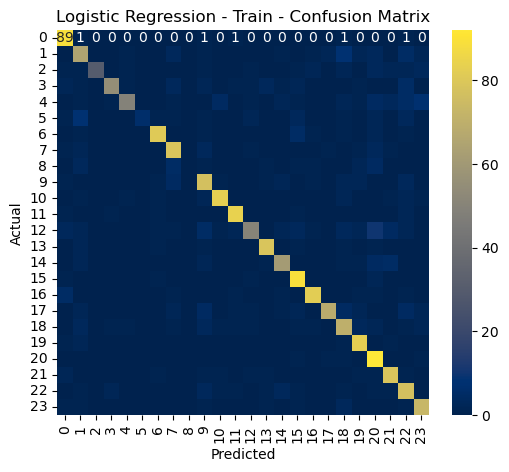

C:\Users\kuldeep verma\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Logistic Regression (Test) Performance:
Accuracy: 0.6459
Precision: 0.6624
Recall: 0.6459
F1-Score: 0.6381
ROC-AUC: 0.9507


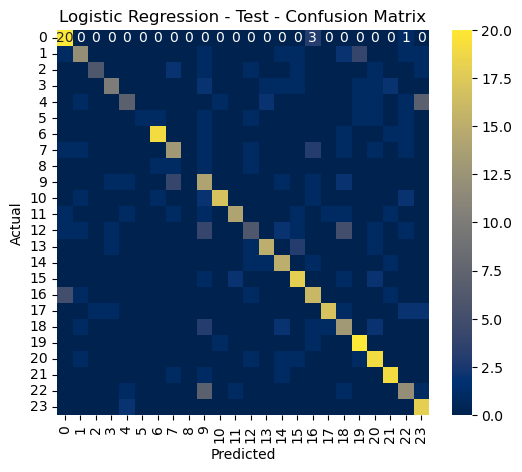

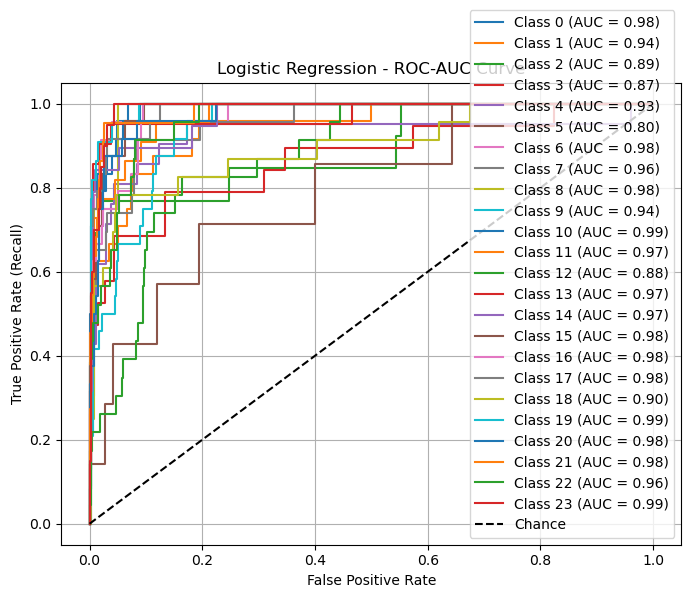


============================== Decision Tree ==============================


C:\Users\kuldeep verma\AppData\Local\Temp\ipykernel_9648\3009348332.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  model_performance_df.loc[len(model_performance_df)] = [



Decision Tree (Train) Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


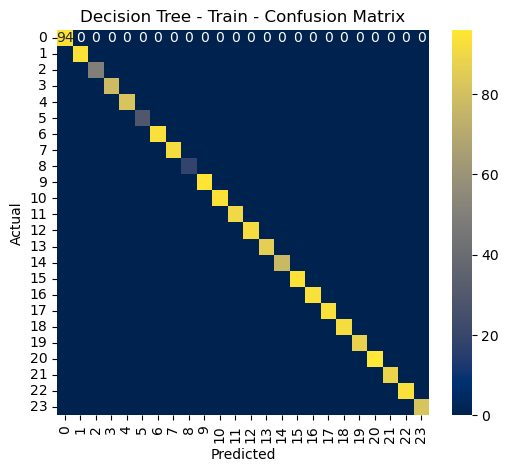


Decision Tree (Test) Performance:
Accuracy: 0.5453
Precision: 0.5600
Recall: 0.5453
F1-Score: 0.5476
ROC-AUC: 0.7498


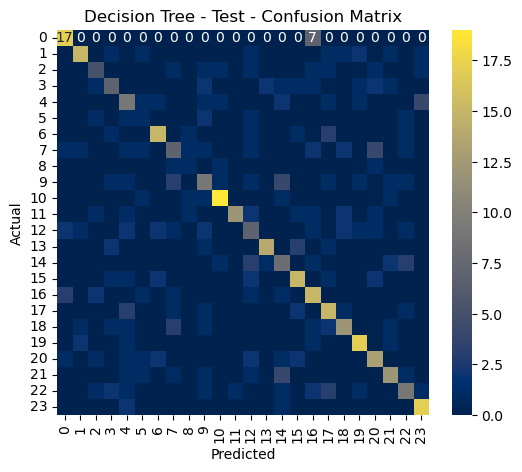

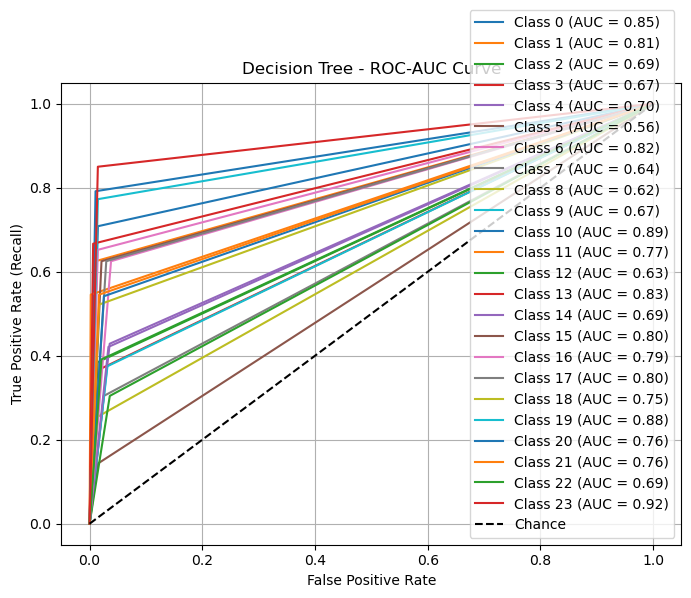


============================== Random Forest ==============================


C:\Users\kuldeep verma\AppData\Local\Temp\ipykernel_9648\3009348332.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  model_performance_df.loc[len(model_performance_df)] = [



Random Forest (Train) Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


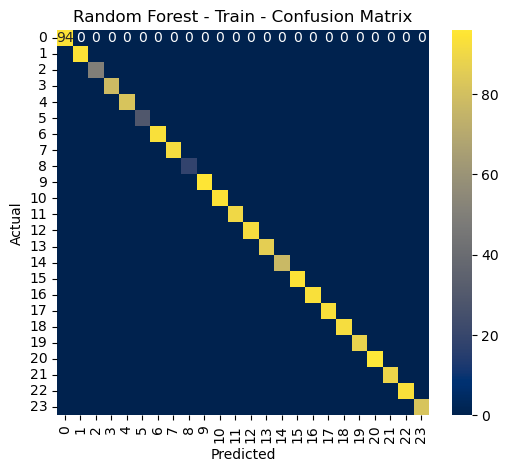

C:\Users\kuldeep verma\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Random Forest (Test) Performance:
Accuracy: 0.6640
Precision: 0.6906
Recall: 0.6640
F1-Score: 0.6474
ROC-AUC: 0.9396


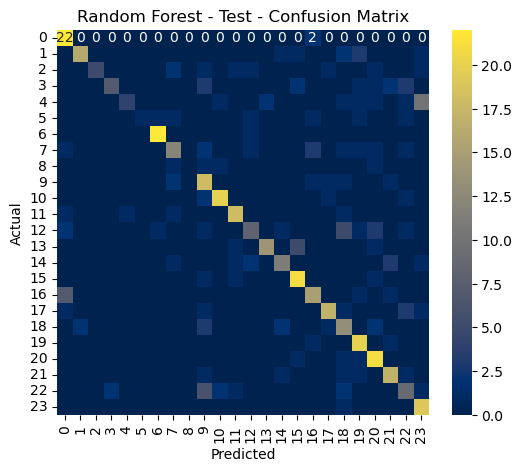

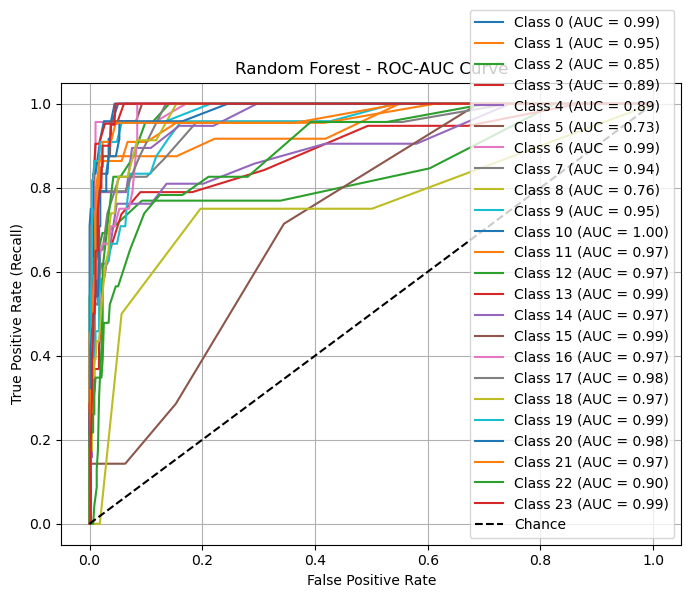


============================== SVM ==============================


C:\Users\kuldeep verma\AppData\Local\Temp\ipykernel_9648\3009348332.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  model_performance_df.loc[len(model_performance_df)] = [



SVM (Train) Performance:
Accuracy: 0.9652
Precision: 0.9669
Recall: 0.9652
F1-Score: 0.9650


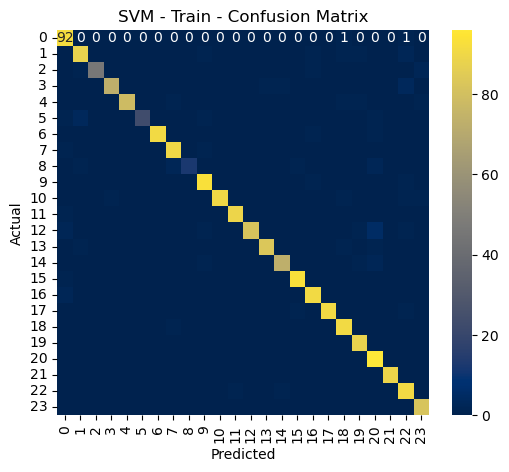

C:\Users\kuldeep verma\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



SVM (Test) Performance:
Accuracy: 0.6117
Precision: 0.6502
Recall: 0.6117
F1-Score: 0.6131
ROC-AUC: 0.9429


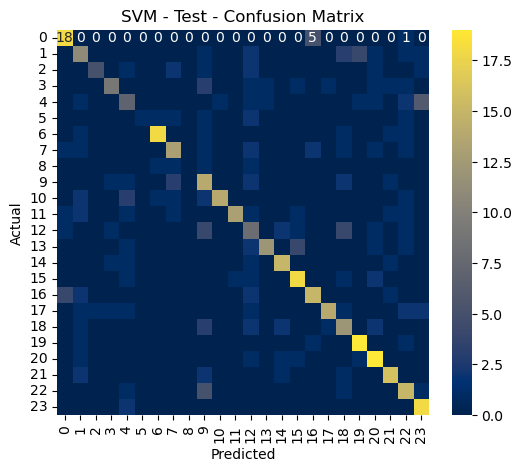

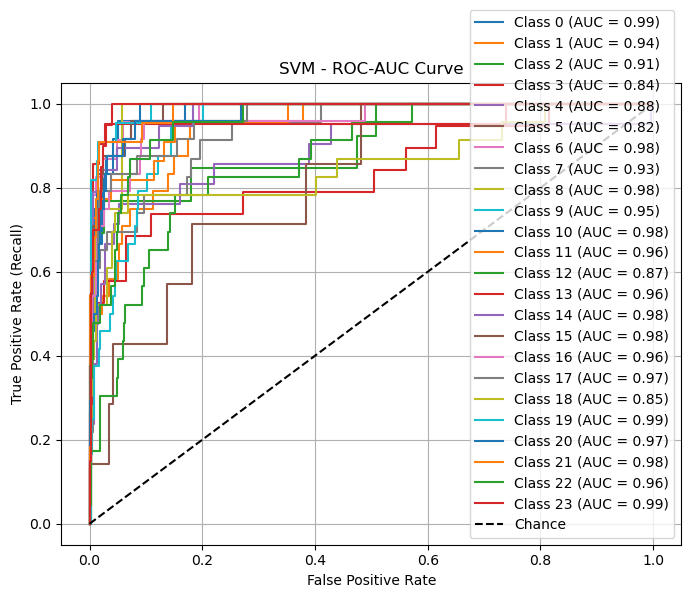


============================== KNN ==============================


C:\Users\kuldeep verma\AppData\Local\Temp\ipykernel_9648\3009348332.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  model_performance_df.loc[len(model_performance_df)] = [



KNN (Train) Performance:
Accuracy: 0.6598
Precision: 0.6702
Recall: 0.6598
F1-Score: 0.6551


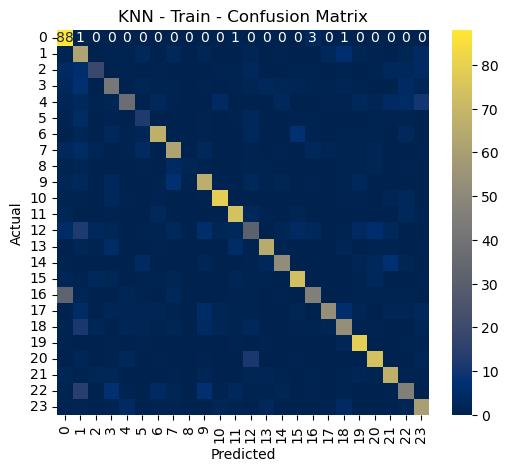

C:\Users\kuldeep verma\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



KNN (Test) Performance:
Accuracy: 0.5312
Precision: 0.5649
Recall: 0.5312
F1-Score: 0.5307
ROC-AUC: 0.8261


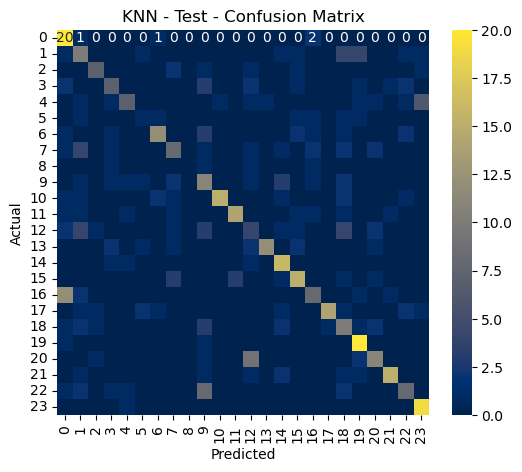

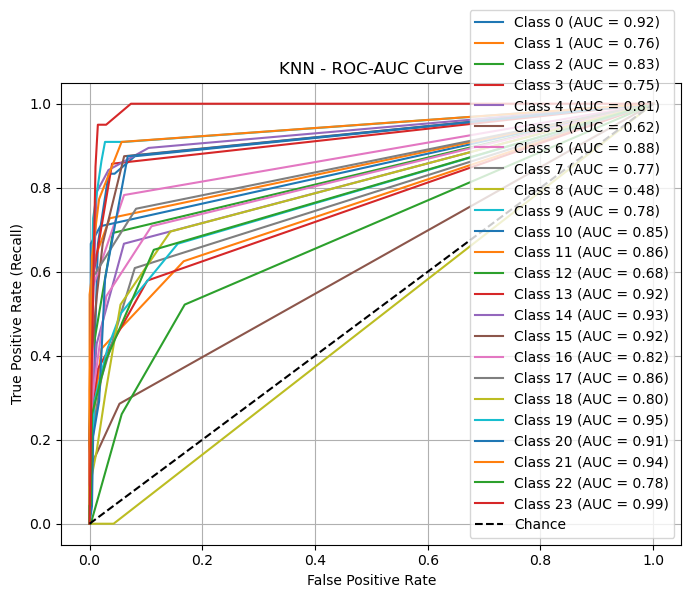


============================== AdaBoost ==============================


C:\Users\kuldeep verma\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kuldeep verma\AppData\Local\Temp\ipykernel_9648\3009348332.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  model_performance_df.loc[len(model_performance_df)] = [



AdaBoost (Train) Performance:
Accuracy: 0.5393
Precision: 0.5571
Recall: 0.5393
F1-Score: 0.5106


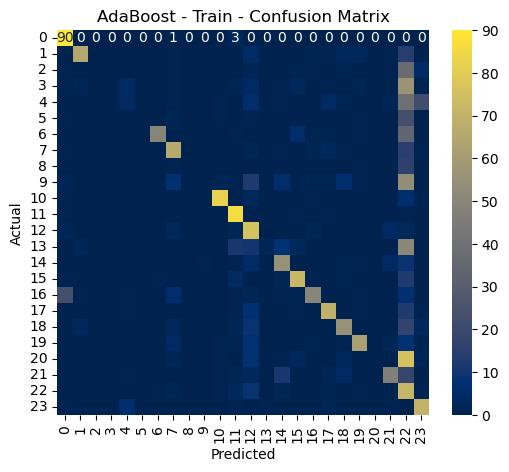

C:\Users\kuldeep verma\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



AdaBoost (Test) Performance:
Accuracy: 0.4930
Precision: 0.5253
Recall: 0.4930
F1-Score: 0.4778
ROC-AUC: 0.8863


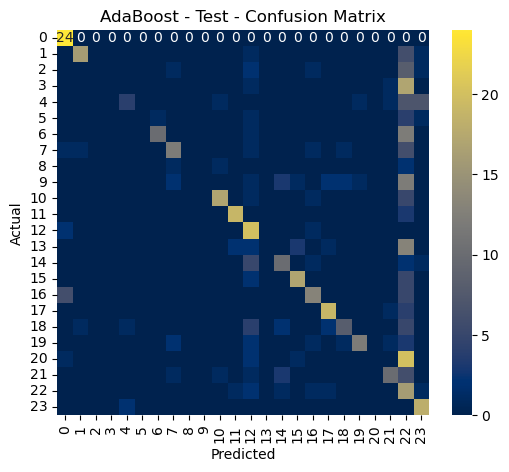

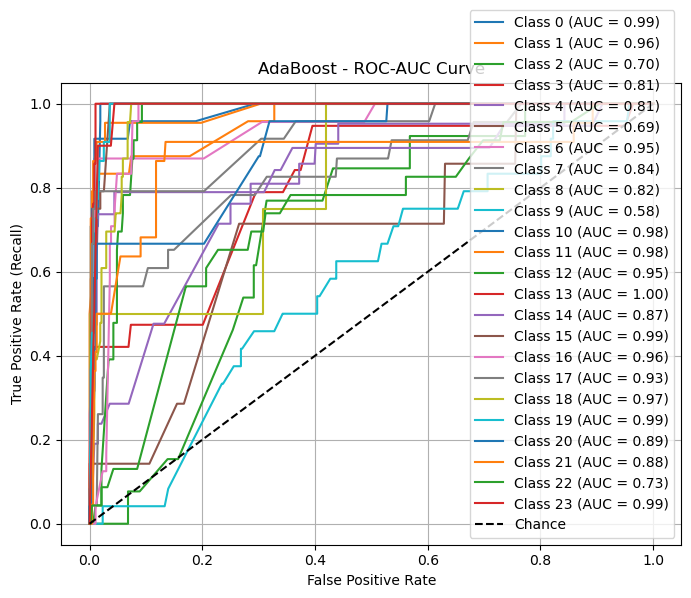


============================== Gradient Boosting ==============================


C:\Users\kuldeep verma\AppData\Local\Temp\ipykernel_9648\3009348332.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  model_performance_df.loc[len(model_performance_df)] = [



Gradient Boosting (Train) Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


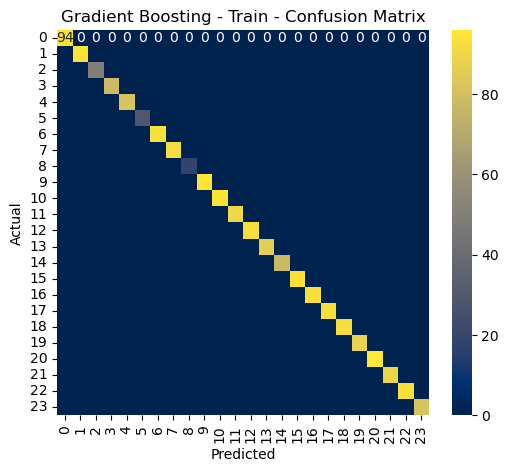


Gradient Boosting (Test) Performance:
Accuracy: 0.7082
Precision: 0.7210
Recall: 0.7082
F1-Score: 0.7065
ROC-AUC: 0.9377


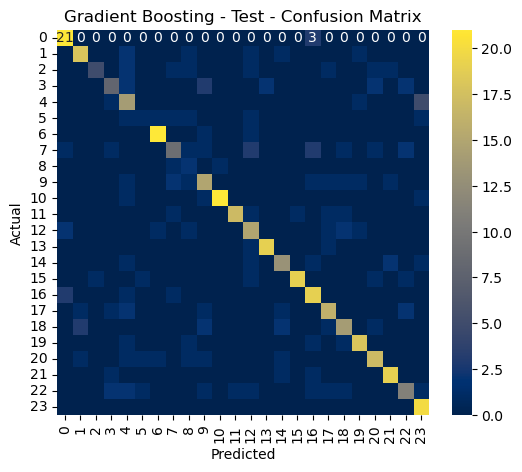

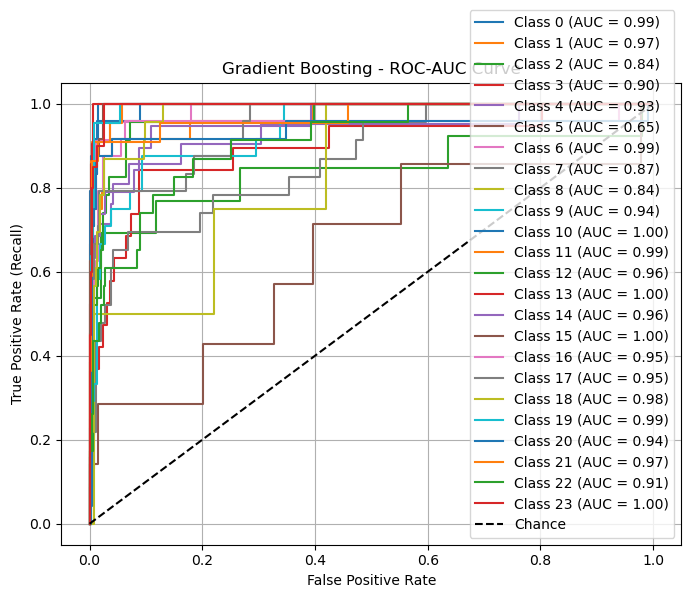


============================== XGBoost ==============================


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23], got ['ACCOUNTANT' 'ADVOCATE' 'AGRICULTURE' 'APPAREL' 'ARTS' 'AUTOMOBILE'
 'AVIATION' 'BANKING' 'BPO' 'BUSINESS-DEVELOPMENT' 'CHEF' 'CONSTRUCTION'
 'CONSULTANT' 'DESIGNER' 'DIGITAL-MEDIA' 'ENGINEERING' 'FINANCE' 'FITNESS'
 'HEALTHCARE' 'HR' 'INFORMATION-TECHNOLOGY' 'PUBLIC-RELATIONS' 'SALES'
 'TEACHER']

In [20]:
for model_name, model in models.items():
    evaluate_multiclass_model(model, X_train_tfidf, X_test_tfidf, y_train, y_test, model_name=model_name)